In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats
plt.style.use('fivethirtyeight')

In this notebook we will do the following.

- Compute the MLE for normal distribution
- Compute the MLE for an exponential distribution
- Fit a normal distribution to asset returns using MLE



In [2]:
# True mean
mean = 40
# True std
std = 10
X = np.random.normal(mean,std, 1000)

Define a function to compute the MLE.

In [3]:
def normal_mu_MLE(X):
    
    T = len(X)
    s = np.sum(X)
    return 1.0/T * s

def sigma_MLE(X):
    
    T = len(X)
    mu = normal_mu_MLE(X)
    s = np.sum(np.power((X - mu), 2))
    
    sigma_squared = 1.0/T * s
    
    return np.sqrt(sigma_squared)

In [4]:
print(f'True mean: {np.mean(X)}')
print('-'*40)
print("Mean Estimation")
print(normal_mu_MLE(X))

True mean: 40.20153761079433
----------------------------------------
Mean Estimation
40.20153761079433


In [5]:
print(f'True std: {np.std(X)}')
print('-'*40)

print("Std Estimation")
print(sigma_MLE(X))

True std: 10.263891289637368
----------------------------------------
Std Estimation
10.263891289637368


Plot the PDF with data to see how well it fits.

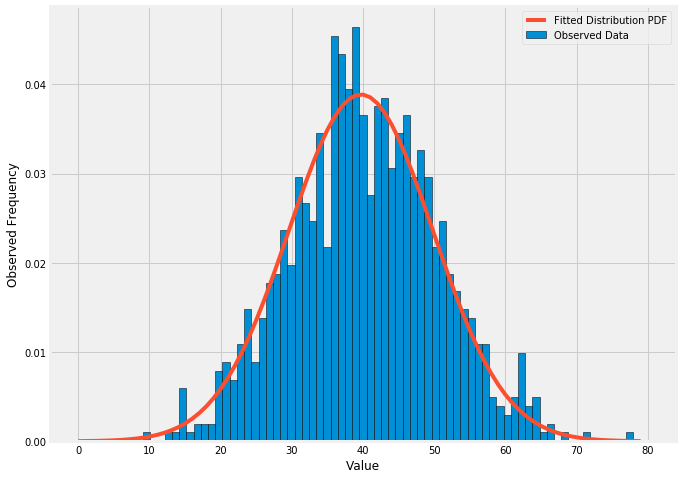

In [6]:
pdf = scipy.stats.norm.pdf

x = np.linspace(0,80,80)
plt.figure(figsize=(10,8))
plt.hist(X, bins=x, density='true',ec='black')
plt.plot(pdf(x, loc=np.mean(X), scale=np.std(X)))
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);

Fitting a normal distribution to some real data. We will use the S&P etf returns

In [7]:
import pandas_datareader as pdr
spy = pdr.get_data_yahoo('SPY', '1993-1-1')['Adj Close'].pct_change()[1:]


The minimum S&P 500 daily return was -0.09844764274028384
The maximum S&P 500 daily return was 0.14519774293548715


''

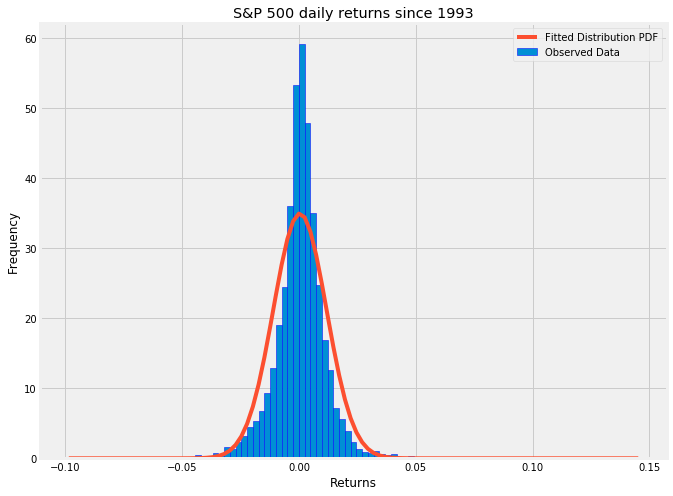

In [8]:
mean = np.mean(spy)
std = np.std(spy)
x = np.linspace(np.min(spy),np.max(spy),num = 100)

print(f"The minimum S&P 500 daily return was {np.min(spy)}")
print(f"The maximum S&P 500 daily return was {np.max(spy)}")


plt.figure(figsize=(10,8))
plt.hist(spy, bins=x, density='true',ec = 'b')
plt.plot(x, pdf(x, loc=mean, scale=std))
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('S&P 500 daily returns since 1993')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);
;

We can observe that the S&P 500 returns are not normally distributed since they have some observations with extreme returns. The stock market has at time exhibited fat tail or black swan events.

In [9]:
from statsmodels.stats.stattools import jarque_bera
_,pvalue,_,_ = jarque_bera(spy)

print(f"The pvalue for S&P 500 returns is {pvalue}")

The pvalue for S&P 500 returns is 0.0


In [10]:
_,pvalue,_,_ = jarque_bera(np.random.normal(0, 1, 100))
print(f"The pvalue for normal distribution is {pvalue}")

The pvalue for normal distribution is 0.6339951177122886


Thus we can conclude that the S&P 500 returns are not normally distributed.